<a href="https://colab.research.google.com/github/MariamMasuan/Popular-Online-Bookstore/blob/main/GROUP10_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing & importing Libraries

In [208]:
!pip install requests
!pip install html5lib
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [209]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

In [210]:
URL = "https://www.popularonline.com.my/default/catalog/category/view/s/best-sellers/id/2186/?top100=month&did=5897"
r = requests.get(URL)
soup = BeautifulSoup(r.content, 'html.parser')

#**ATTRIBUTE 1: AUTHOR**

#**ATTRIBUTE 2 : USUAL PRICE**

Scrape data for author and usual price

In [211]:
author = []
usual = []
for item in soup.findAll('li', class_='item'):
  if(item.find('span', class_='auth') is not None):
    author_temp = item.find('span', class_='auth').text
    author.append(author_temp)
  else:
    author_temp = 'None'
    author.append(author_temp)
  usual_temp = item.find('span', class_='regular-price').text
  usual.append(usual_temp)

print(author, usual)

['Author:\nVivy Yusof\n', 'Author:\nJoey Yap\n', 'Author:\nJay Shetty\n', 'Author:\nJoey Yap\n', 'Author:\nJoey Yap\n', 'Author:\nLillian Too & Jennifer Too \n', 'Author:\nJoey Yap\n', 'Author:\nJoey Yap\n', 'Author:\nJeff Kinney\n', 'Author:\nLillian Too & Jennifer Too \n', 'Author:\nBaek Se-hee\n', 'Author:\nColleen Hoover\n', 'Author:\nAna Huang\n', 'Author:\nElla Maise\n', 'Author:\nAna Huang\n', 'Author:\nAna Huang\n', 'Author:\nLillian Too & Jennifer Too \n', 'Author:\nLillian Too & Jennifer Too \n', 'Author:\nLillian Too & Jennifer Too \n', 'Author:\nENDO TATSUYA\n', 'Author:\nENDO TATSUYA\n', 'Author:\nPat Parsons\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t, \t\t\t\t\t\t\t\t\t\tSara Miles\n', 'Author:\nSarah Gladding\n', 'Author:\nEndo Tatsuya\n', 'Author:\nJoey Yap\n', 'Author:\nLillian Too & Jennifer Too \n', 'Author:\nLillian Too & Jennifer Too \n', 'Author:\nLillian Too & Jennifer Too \n', 'Author:\nLillian Too & Jennifer Too \n', 'Author:\nColleen Hoover\n'

In [212]:
df_nazifa = pd.DataFrame({
    "Author": author,
    "Usual Price (RM)": usual
})

df_nazifa

,Author,Usual Price (RM)
0,Author:\nVivy Yusof\n,\nRM79.90
1,Author:\nJoey Yap\n,\nRM23.00
2,Author:\nJay Shetty\n,\nRM89.90
3,Author:\nJoey Yap\n,\nRM17.00
4,Author:\nJoey Yap\n,\nRM32.00
...,...,...
95,Author:\nNeko\n,\nRM12.00
96,Author:\nJulia Quinn\n,\nRM45.90
97,Author:\nJulia Quinn\n,\nRM45.90
98,Author:\nJulia Quinn\n,\nRM45.90


Data Visualization for Author before Data Cleaning

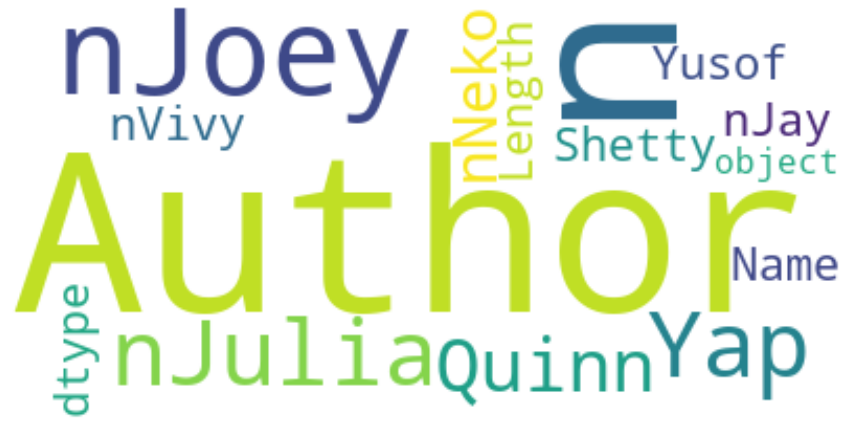

In [213]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate(str(df_nazifa["Author"]))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Data cleaning: Remove \n, :, 'Author'

In [214]:
df_nazifa['Author'] = df_nazifa['Author'].str.replace('\n', '')
df_nazifa['Author'] = df_nazifa['Author'].str.replace('\t', '')
df_nazifa['Author'] = df_nazifa['Author'].str.replace(':', '')
df_nazifa['Author'] = df_nazifa['Author'].str.replace('Author', '')
df_nazifa

,Author,Usual Price (RM)
0,Vivy Yusof,\nRM79.90
1,Joey Yap,\nRM23.00
2,Jay Shetty,\nRM89.90
3,Joey Yap,\nRM17.00
4,Joey Yap,\nRM32.00
...,...,...
95,Neko,\nRM12.00
96,Julia Quinn,\nRM45.90
97,Julia Quinn,\nRM45.90
98,Julia Quinn,\nRM45.90


Data Cleaning : Change to lowercase

In [215]:
df_nazifa['Author'] = df_nazifa['Author'].str.lower()
df_nazifa

,Author,Usual Price (RM)
0,vivy yusof,\nRM79.90
1,joey yap,\nRM23.00
2,jay shetty,\nRM89.90
3,joey yap,\nRM17.00
4,joey yap,\nRM32.00
...,...,...
95,neko,\nRM12.00
96,julia quinn,\nRM45.90
97,julia quinn,\nRM45.90
98,julia quinn,\nRM45.90


Visualization after Data Cleaning

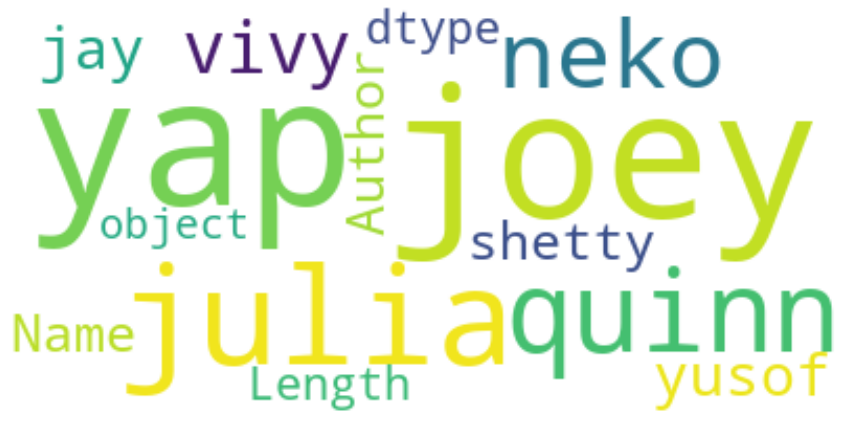

In [216]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate(str(df_nazifa["Author"]))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Data Cleaning : Remove \n

In [217]:
df_nazifa['Usual Price (RM)'] = df_nazifa['Usual Price (RM)'].str.replace('\n', '')
df_nazifa

,Author,Usual Price (RM)
0,vivy yusof,RM79.90
1,joey yap,RM23.00
2,jay shetty,RM89.90
3,joey yap,RM17.00
4,joey yap,RM32.00
...,...,...
95,neko,RM12.00
96,julia quinn,RM45.90
97,julia quinn,RM45.90
98,julia quinn,RM45.90


Data Cleaning : Remove 'RM'

In [218]:
df_nazifa['Usual Price (RM)'] = df_nazifa['Usual Price (RM)'].str.replace('RM', '')
df_nazifa

,Author,Usual Price (RM)
0,vivy yusof,79.90
1,joey yap,23.00
2,jay shetty,89.90
3,joey yap,17.00
4,joey yap,32.00
...,...,...
95,neko,12.00
96,julia quinn,45.90
97,julia quinn,45.90
98,julia quinn,45.90


In [219]:
df_nazifa['Usual Price (RM)'] = df_nazifa['Usual Price (RM)'].astype(float)

In [220]:
df_nazifa

,Author,Usual Price (RM)
0,vivy yusof,79.9
1,joey yap,23.0
2,jay shetty,89.9
3,joey yap,17.0
4,joey yap,32.0
...,...,...
95,neko,12.0
96,julia quinn,45.9
97,julia quinn,45.9
98,julia quinn,45.9


# **DATA VISUALISATION: ATTRIBUTE 1 & ATTRIBUTE 2**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


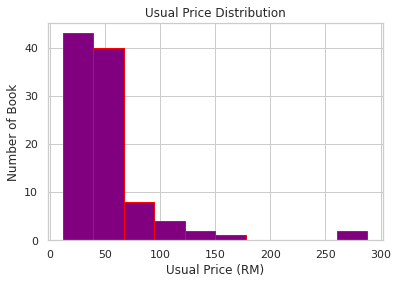

In [221]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_nazifa['Usual Price (RM)'],
         facecolor='purple',
         edgecolor='red',
         bins=10)
plt.xlabel('Usual Price (RM)')
plt.ylabel('Number of Book')
plt.title('Usual Price Distribution')
plt.show()

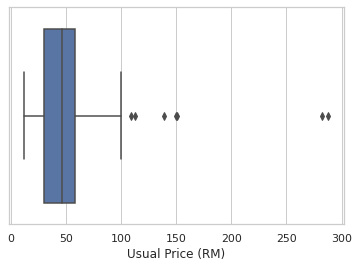

In [222]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

seaborn.boxplot(x = df_nazifa['Usual Price (RM)'])

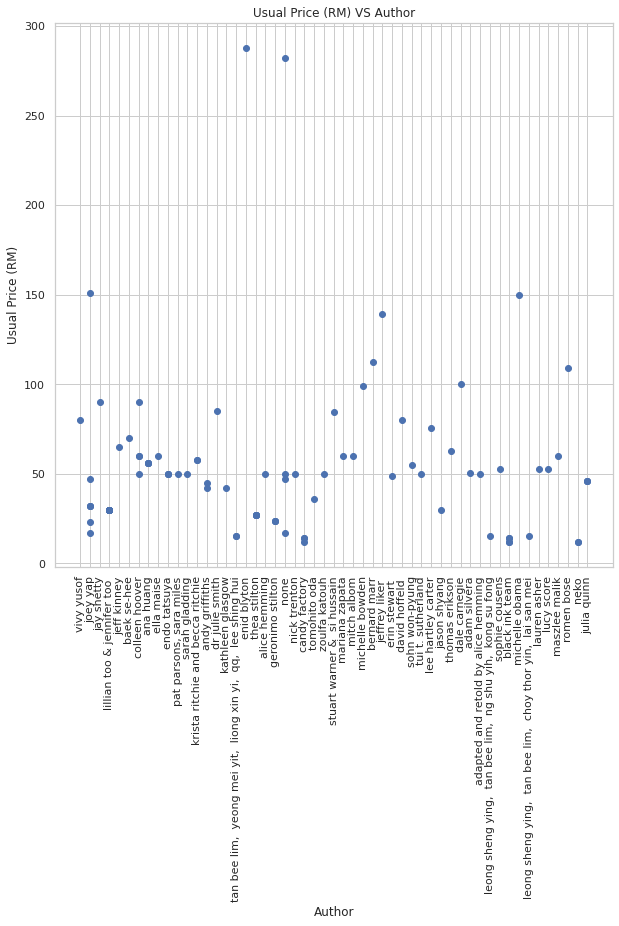

In [223]:
plt.figure(figsize=(10,10))
plt.scatter(df_nazifa['Author'], df_nazifa['Usual Price (RM)'])
plt.title('Usual Price (RM) VS Author')
plt.xlabel('Author')
plt.xticks(rotation=90)
plt.ylabel('Usual Price (RM)')
plt.show()

# **ATTRIBUTE 3: BOOK TITLE**

Scrape data for book title from Popular Online Book Store web site

In [224]:
title = [x.get_text() for x in soup.find_all('h2', attrs = {'class': 'product-name'})]
print(title)

['The First Decade: My Journey from Blogger to Entrepreneur', 'Tong Shu Desktop Calendar 2023', '8 Rules of Love: How to Find It, Keep It, and Let It Go', 'Tong Shu Monthly Planner 2023 (Random colour x 1)', 'JOEY YAP’S TELEGRAM DAILY TONG SHU CALENDAR', "Lillian Too's Feng Shui Almanac 2023", 'Weekly Tong Shu Diary 2023', 'Chinese Astrology For 2023', 'Diary Of Wimpy Kid 17: Diper Overlode', 'Fortune & Feng Shui 2023 - Horse', 'I Want to Die But I Want to Eat Tteokbokki', 'It Ends with Us', 'Twisted Lies', 'Marriage For One', 'Twisted Hate', 'Twisted Love', 'Fortune & Feng Shui 2023 - Snake', 'Fortune & Feng Shui 2023 - Tiger', 'Fortune & Feng Shui 2023 - Rabbit', 'SPY X FAMILY #05', 'SPY X FAMILY #06', "LET'S READ-BEGINNER SET 1(BK1-5) 2ND ED", 'KEY TO READING SET 2 (BK5-8) 2ND ED', 'SPY X FAMILY #08', 'Feng Shui For 2023', 'Fortune & Feng Shui 2023 - Sheep', 'Fortune & Feng Shui 2023 - Rooster', 'Fortune & Feng Shui 2023 - Ox', 'Fortune & Feng Shui 2023 - Dragon', 'It Ends with Us',

In [225]:
title_df = pd.DataFrame({
    "Book Title": title
})

title_df

,Book Title
0,The First Decade: My Journey from Blogger to E...
1,Tong Shu Desktop Calendar 2023
2,"8 Rules of Love: How to Find It, Keep It, and ..."
3,Tong Shu Monthly Planner 2023 (Random colour x 1)
4,JOEY YAP’S TELEGRAM DAILY TONG SHU CALENDAR
...,...
95,Candy Cuties 14 Fruit-Filled Roll Cakes Topic:...
96,"To Sir Phillip, With Love"
97,Romancing Mr Bridgerton
98,When He Was Wicked


Data Visualization before Data Cleaning

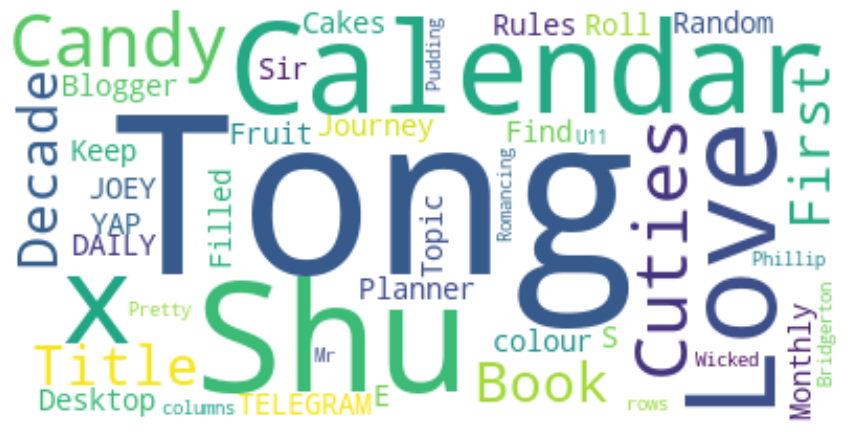

In [226]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate(str(title_df))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Data Cleaning
1. Check if there is null value
2. Check if there is duplicate value

In [227]:
title_df.isnull().sum()

Book Title    0
dtype: int64

In [228]:
title_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

3. Convert the book title to lowercase

In [229]:
title_df['Book Title'] = title_df['Book Title'].str.lower()
title_df

,Book Title
0,the first decade: my journey from blogger to e...
1,tong shu desktop calendar 2023
2,"8 rules of love: how to find it, keep it, and ..."
3,tong shu monthly planner 2023 (random colour x 1)
4,joey yap’s telegram daily tong shu calendar
...,...
95,candy cuties 14 fruit-filled roll cakes topic:...
96,"to sir phillip, with love"
97,romancing mr bridgerton
98,when he was wicked


4. Strip white space from the book title

In [230]:
title_df['Book Title'] = title_df['Book Title'].str.strip()
title_df

,Book Title
0,the first decade: my journey from blogger to e...
1,tong shu desktop calendar 2023
2,"8 rules of love: how to find it, keep it, and ..."
3,tong shu monthly planner 2023 (random colour x 1)
4,joey yap’s telegram daily tong shu calendar
...,...
95,candy cuties 14 fruit-filled roll cakes topic:...
96,"to sir phillip, with love"
97,romancing mr bridgerton
98,when he was wicked


Data Visualization after Data Cleaning

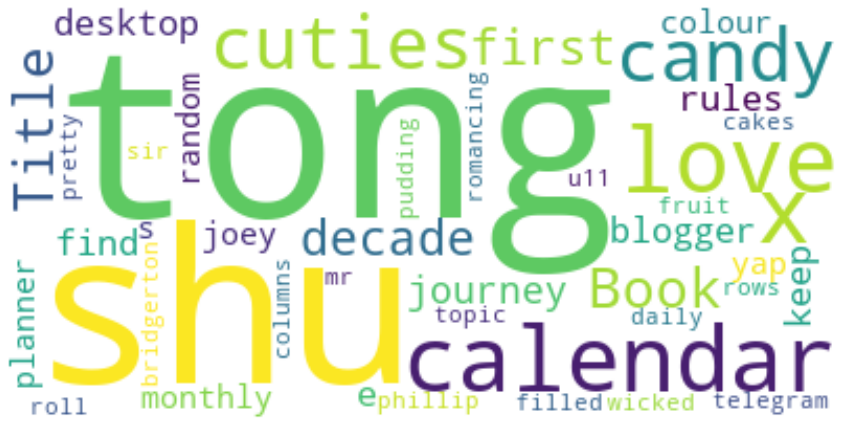

In [231]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate(str(title_df))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **ATTRIBUTE 4: NOW PRICE**

Scrape data for Now Price from Popular Online Book Store web site

In [232]:
now_price = [x.get_text() for x in soup.find_all('p', attrs = {'class': 'member-price'})]
print(now_price)

['\n NOW:\n\n RM\n\n\t\t\t\t\t67.90\n(-15%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t59.90\n(-25%) \n', '\n NOW:\n\n RM\n\n\t\t\t\t\t17.90\n(-22%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t18.40\n(-20%) \n', '\n NOW:\n\n RM\n\n\t\t\t\t\t89.90\n(-0%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t80.91\n(-10%) \n', '\n NOW:\n\n RM\n\n\t\t\t\t\t15.30\n(-10%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t13.60\n(-20%) \n', '\n NOW:\n\n RM\n\n\t\t\t\t\t28.80\n(-10%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t25.60\n(-20%) \n', '\n NOW:\n\n RM\n\n\t\t\t\t\t22.90\n(-23%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t23.84\n(-20%) \n', '\n NOW:\n\n RM\n\n\t\t\t\t\t42.30\n(-10%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t37.60\n(-20%) \n', '\n NOW:\n\n RM\n\n\t\t\t\t\t28.80\n(-10%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t25.60\n(-20%) \n', '\n NOW:\n\n RM\n\n\t\t\t\t\t58.46\n(-10%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t51.96\n(-20%) \n', '\n NOW:\n\n RM\n\n\t\t\t\t\t26.82\n(-10%) \n', '\nMEMBER:\n\n RM\n\n\t\t\t\t\t23.84\n(-20%) \n', '\n NOW:\n\n RM\n\n\

In [233]:
now_price_df = pd.DataFrame({
    "Now Price (RM)": now_price
})

now_price_df

,Now Price (RM)
0,\n NOW:\n\n RM\n\n\t\t\t\t\t67.90\n(-15%) \n
1,\nMEMBER:\n\n RM\n\n\t\t\t\t\t59.90\n(-25%) \n
2,\n NOW:\n\n RM\n\n\t\t\t\t\t17.90\n(-22%) \n
3,\nMEMBER:\n\n RM\n\n\t\t\t\t\t18.40\n(-20%) \n
4,\n NOW:\n\n RM\n\n\t\t\t\t\t89.90\n(-0%) \n
...,...
195,\nMEMBER:\n\n RM\n\n\t\t\t\t\t41.31\n(-10%) \n
196,\n NOW:\n\n RM\n\n\t\t\t\t\t45.90\n(-0%) \n
197,\nMEMBER:\n\n RM\n\n\t\t\t\t\t41.31\n(-10%) \n
198,\n NOW:\n\n RM\n\n\t\t\t\t\t12.00\n(-0%) \n


###Data Cleaning
1. Remove the character '\n'
2. Remove the character '\t'
3. Remove the character 'NOW:'
4. Remove the character 'RM'

In [234]:
now_price_df['Now Price (RM)'] = now_price_df['Now Price (RM)'].str.replace('\n', '')
now_price_df['Now Price (RM)'] = now_price_df['Now Price (RM)'].str.replace('\t', '')
now_price_df['Now Price (RM)'] = now_price_df['Now Price (RM)'].str.replace('NOW:', '')
now_price_df['Now Price (RM)'] = now_price_df['Now Price (RM)'].str.replace('RM', '')
now_price_df

,Now Price (RM)
0,67.90(-15%)
1,MEMBER: 59.90(-25%)
2,17.90(-22%)
3,MEMBER: 18.40(-20%)
4,89.90(-0%)
...,...
195,MEMBER: 41.31(-10%)
196,45.90(-0%)
197,MEMBER: 41.31(-10%)
198,12.00(-0%)


5. Drop columns for member price (odd number rows)

In [235]:
l = []
for i in now_price_df.index.values:
   if(i%2==1):
      l.append(i)

print(l)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199]


In [236]:
now_price_df.drop(now_price_df.index[l], inplace=True)
now_price_df

,Now Price (RM)
0,67.90(-15%)
2,17.90(-22%)
4,89.90(-0%)
6,15.30(-10%)
8,28.80(-10%)
...,...
190,12.00(-0%)
192,45.90(-0%)
194,45.90(-0%)
196,45.90(-0%)


In [237]:
now_price_df = now_price_df.reset_index(drop=True)
now_price_df

,Now Price (RM)
0,67.90(-15%)
1,17.90(-22%)
2,89.90(-0%)
3,15.30(-10%)
4,28.80(-10%)
...,...
95,12.00(-0%)
96,45.90(-0%)
97,45.90(-0%)
98,45.90(-0%)


6. Remove the book discount (remove the bracket and the string inside the braket)

In [238]:
for i in range(len(now_price_df)):
    strt_pos = now_price_df['Now Price (RM)'].values[i].find('(')
    stop_pos = now_price_df['Now Price (RM)'].values[i].find(')')
    now_price_df['Now Price (RM)'].values[i] = f"{now_price_df['Now Price (RM)'].values[i][:strt_pos:].strip()} {now_price_df['Now Price (RM)'].values[i][stop_pos+1:].strip()}"

In [239]:
now_price_df

,Now Price (RM)
0,67.90
1,17.90
2,89.90
3,15.30
4,28.80
...,...
95,12.00
96,45.90
97,45.90
98,45.90


7. Convert data type for value in Now Price column from string to float

In [240]:
now_price_df['Now Price (RM)'] = now_price_df['Now Price (RM)'].astype(float)
print (now_price_df.dtypes)

Now Price (RM)    float64
dtype: object


In [241]:
now_price_df

,Now Price (RM)
0,67.9
1,17.9
2,89.9
3,15.3
4,28.8
...,...
95,12.0
96,45.9
97,45.9
98,45.9


After Cleaning
Combining the title dataframe and now price dataframe

In [242]:
combined_aini = title_df.join(now_price_df)
combined_aini

,Book Title,Now Price (RM)
0,the first decade: my journey from blogger to e...,67.9
1,tong shu desktop calendar 2023,17.9
2,"8 rules of love: how to find it, keep it, and ...",89.9
3,tong shu monthly planner 2023 (random colour x 1),15.3
4,joey yap’s telegram daily tong shu calendar,28.8
...,...,...
95,candy cuties 14 fruit-filled roll cakes topic:...,12.0
96,"to sir phillip, with love",45.9
97,romancing mr bridgerton,45.9
98,when he was wicked,45.9


# **DATA VISUALISATION: ATTRIBUTE 3 & ATTRIBUTE 4**

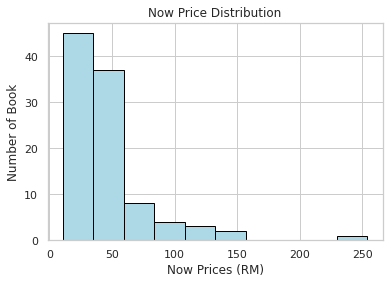

In [243]:
import matplotlib.pyplot as plt
plt.hist(combined_aini['Now Price (RM)'],
         facecolor = 'lightblue',
         edgecolor = 'black',
         bins = 10)
plt.xlabel('Now Prices (RM)')
plt.ylabel('Number of Book')
plt.title('Now Price Distribution')
plt.show()

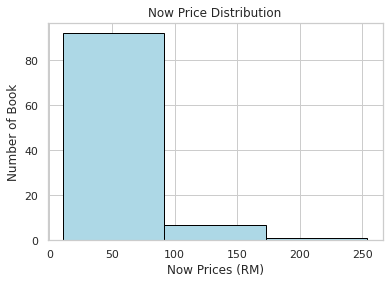

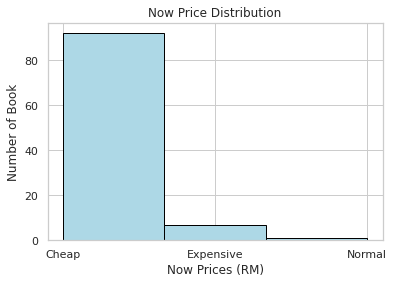

In [244]:
from matplotlib import pyplot as plt
plt.hist(combined_aini['Now Price (RM)'],
         facecolor = 'lightblue',
         edgecolor = 'black',
         bins = 3,
         align = 'mid', ) 
plt.xlabel('Now Prices (RM)')
plt.ylabel('Number of Book')
plt.title('Now Price Distribution')
plt.show()

print("")

combined_aini['Label'] = pd.cut(combined_aini['Now Price (RM)'], 3, labels=['Cheap', 'Expensive', 'Normal'])
plt.hist(combined_aini['Label'],
         facecolor = 'lightblue',
         edgecolor = 'black',
         bins = 3,
         align = 'mid') 
plt.xlabel('Now Prices (RM)')
plt.ylabel('Number of Book')
plt.title('Now Price Distribution')
plt.show()

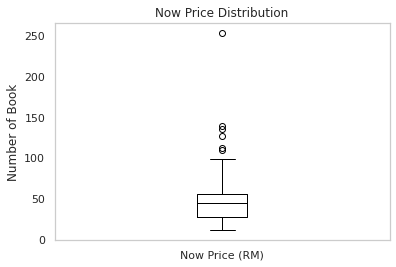

In [245]:
combined_aini.boxplot(column=['Now Price (RM)'], grid=False, color='black')
plt.ylabel('Number of Book')
plt.title('Now Price Distribution')
plt.show()

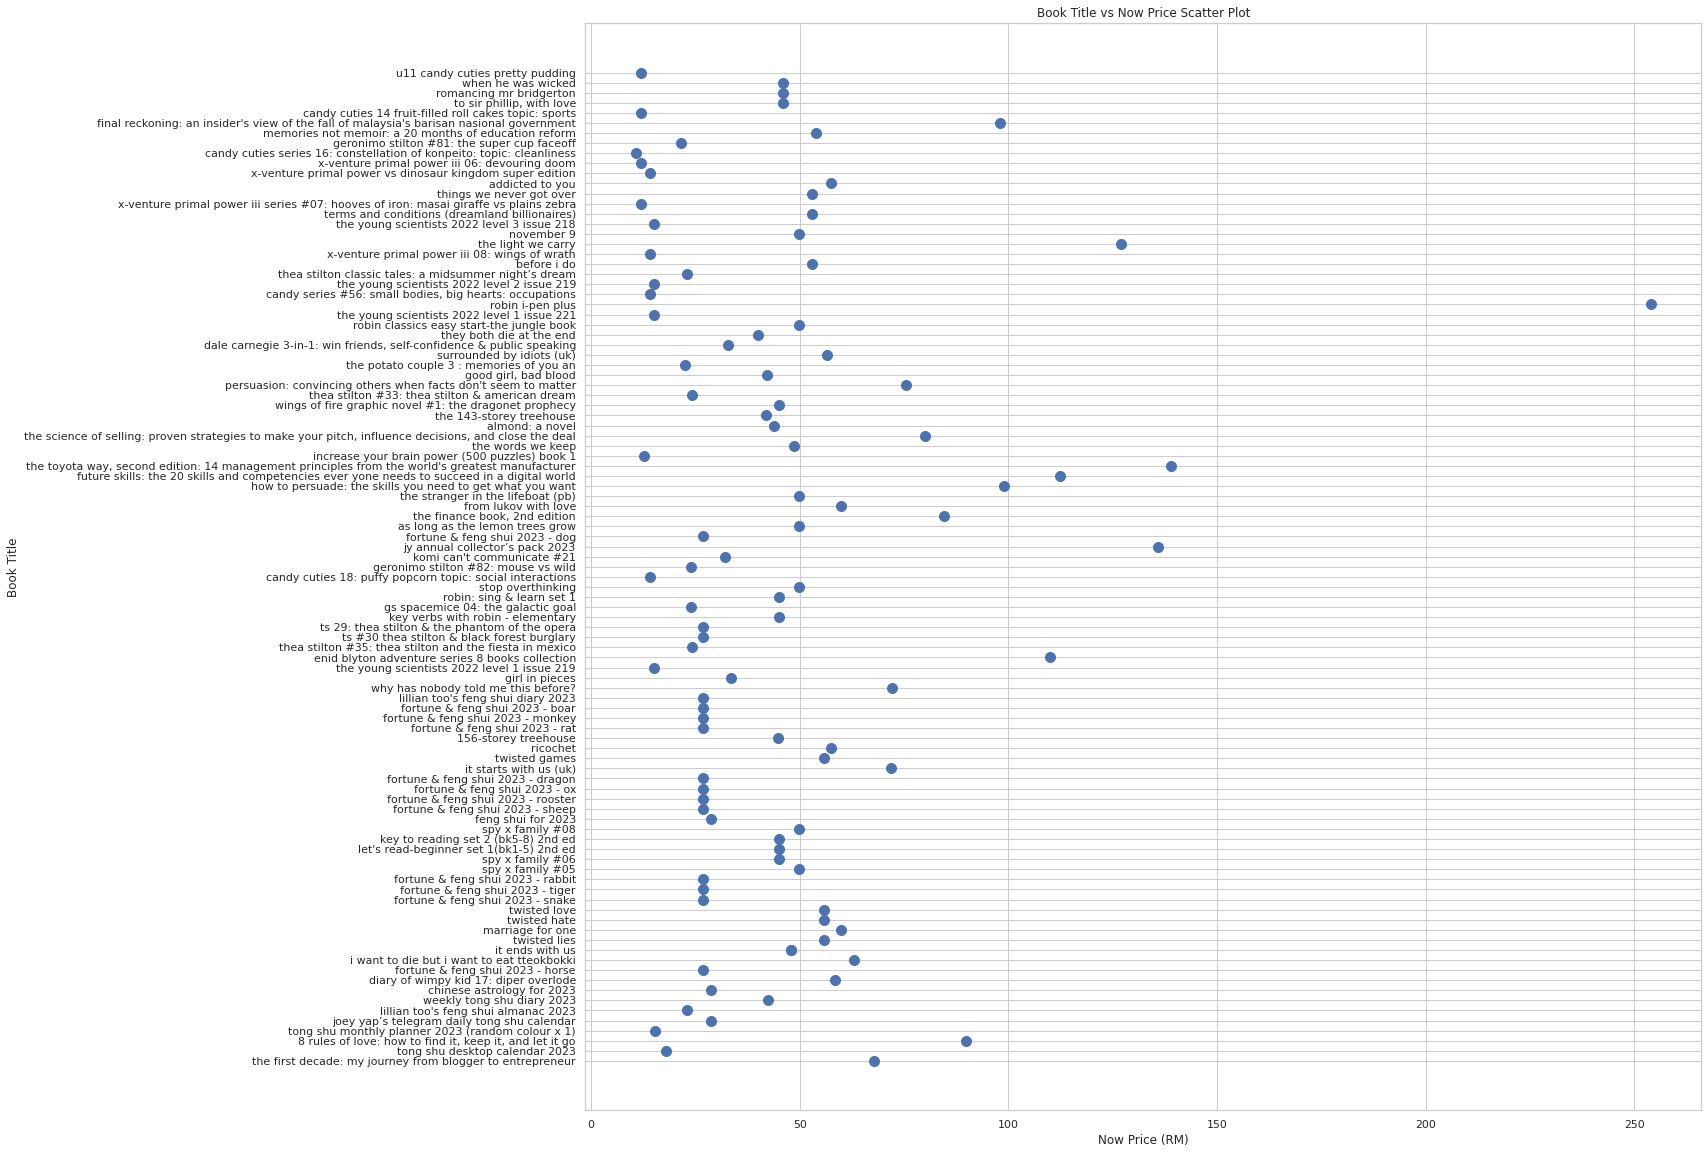

In [246]:
combined_aini.plot.scatter(x = 'Now Price (RM)', y = 'Book Title', s = 100, grid=True);
#plt.figure(figsize=(50,8))
plt.title('Book Title vs Now Price Scatter Plot')
plt.gcf().set_size_inches((20, 20)) 
plt.show()

# **ATTRIBUTE 5: RANKING**
# **ATTRIBUTE 6: NOW DISCOUNT**

In [247]:
disc_now = []
ranking = []
for item in soup.findAll('li', class_='item'):
  temp_disc_now = item.find('span', class_='save-percentag').text
  disc_now.append(temp_disc_now)
  temp_ranking = item.find('div', class_='top-count').text
  ranking.append(temp_ranking)

print(disc_now, ranking)

['(-15%)', '(-22%)', '(-0%)', '(-10%)', '(-10%)', '(-23%)', '(-10%)', '(-10%)', '(-10%)', '(-10%)', '(-10%)', '(-20%)', '(-0%)', '(-0%)', '(-0%)', '(-0%)', '(-10%)', '(-10%)', '(-10%)', '(-0%)', '(-10%)', '(-10%)', '(-10%)', '(-0%)', '(-10%)', '(-10%)', '(-10%)', '(-10%)', '(-10%)', '(-20%)', '(-20%)', '(-0%)', '(-0%)', '(-0%)', '(-10%)', '(-10%)', '(-10%)', '(-10%)', '(-15%)', '(-20%)', '(-0%)', '(-62%)', '(-10%)', '(-0%)', '(-0%)', '(-10%)', '(-0%)', '(-10%)', '(-0%)', '(-0%)', '(-0%)', '(-10%)', '(-10%)', '(-10%)', '(-0%)', '(-0%)', '(-0%)', '(-17%)', '(-0%)', '(-0%)', '(-0%)', '(-25%)', '(-0%)', '(-0%)', '(-20%)', '(-0%)', '(-10%)', '(-10%)', '(-0%)', '(-10%)', '(-25%)', '(-10%)', '(-67%)', '(-21%)', '(-0%)', '(-0%)', '(-10%)', '(-0%)', '(-0%)', '(-15%)', '(-0%)', '(-0%)', '(-15%)', '(-0%)', '(-0%)', '(-0%)', '(-0%)', '(-0%)', '(-0%)', '(-0%)', '(-0%)', '(-10%)', '(-10%)', '(-10%)', '(-10%)', '(-0%)', '(-0%)', '(-0%)', '(-0%)', '(-0%)'] ['\n\t\t\t\t\t\tTop 1 ', '\n\t\t\t\t\t\tTop 2

In [248]:
df_nadya = pd.DataFrame({
    "Ranking": ranking,
    "Now Discount(%)" : disc_now
})

df_nadya

,Ranking,Now Discount(%)
0,\n\t\t\t\t\t\tTop 1,(-15%)
1,\n\t\t\t\t\t\tTop 2,(-22%)
2,\n\t\t\t\t\t\tTop 3,(-0%)
3,\n\t\t\t\t\t\tTop 4,(-10%)
4,\n\t\t\t\t\t\tTop 5,(-10%)
...,...,...
95,\n\t\t\t\t\t\tTop 96,(-0%)
96,\n\t\t\t\t\t\tTop 97,(-0%)
97,\n\t\t\t\t\t\tTop 98,(-0%)
98,\n\t\t\t\t\t\tTop 99,(-0%)


In [249]:
missing_data = df_nadya.isnull()

In [250]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Ranking
False    100
Name: Ranking, dtype: int64

Now Discount(%)
False    100
Name: Now Discount(%), dtype: int64



In [251]:
df_nadya['Ranking'] = df_nadya['Ranking'].str.replace('\n\t\t\t\t\t\t','')
df_nadya

,Ranking,Now Discount(%)
0,Top 1,(-15%)
1,Top 2,(-22%)
2,Top 3,(-0%)
3,Top 4,(-10%)
4,Top 5,(-10%)
...,...,...
95,Top 96,(-0%)
96,Top 97,(-0%)
97,Top 98,(-0%)
98,Top 99,(-0%)


In [252]:
df_nadya['Ranking'] = df_nadya['Ranking'].str.replace('Top ','')
df_nadya

,Ranking,Now Discount(%)
0,1,(-15%)
1,2,(-22%)
2,3,(-0%)
3,4,(-10%)
4,5,(-10%)
...,...,...
95,96,(-0%)
96,97,(-0%)
97,98,(-0%)
98,99,(-0%)


In [253]:
df_nadya['Ranking'] = df_nadya['Ranking'].astype(int)

In [254]:
temp=df_nadya["Ranking"].is_monotonic
print("The 'Ranking' column is sorted:",temp)

The 'Ranking' column is sorted: True


In [255]:
df_nadya

,Ranking,Now Discount(%)
0,1,(-15%)
1,2,(-22%)
2,3,(-0%)
3,4,(-10%)
4,5,(-10%)
...,...,...
95,96,(-0%)
96,97,(-0%)
97,98,(-0%)
98,99,(-0%)


In [256]:
df_nadya['Now Discount(%)'] = df_nadya['Now Discount(%)'].str.replace('(','')
df_nadya

<ipython-input-256-c8e905bc3cd2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_nadya['Now Discount(%)'] = df_nadya['Now Discount(%)'].str.replace('(','')


,Ranking,Now Discount(%)
0,1,-15%)
1,2,-22%)
2,3,-0%)
3,4,-10%)
4,5,-10%)
...,...,...
95,96,-0%)
96,97,-0%)
97,98,-0%)
98,99,-0%)


In [257]:
df_nadya['Now Discount(%)'] = df_nadya['Now Discount(%)'].str.replace('%','')
df_nadya

,Ranking,Now Discount(%)
0,1,-15)
1,2,-22)
2,3,-0)
3,4,-10)
4,5,-10)
...,...,...
95,96,-0)
96,97,-0)
97,98,-0)
98,99,-0)


In [258]:
df_nadya['Now Discount(%)'] = df_nadya['Now Discount(%)'].str.replace(')','')
df_nadya

<ipython-input-258-afed0ed677f9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_nadya['Now Discount(%)'] = df_nadya['Now Discount(%)'].str.replace(')','')


,Ranking,Now Discount(%)
0,1,-15
1,2,-22
2,3,-0
3,4,-10
4,5,-10
...,...,...
95,96,-0
96,97,-0
97,98,-0
98,99,-0


In [259]:
df_nadya['Now Discount(%)'] = df_nadya['Now Discount(%)'].astype(int)

In [260]:
df_nadya['Now Discount(%)'] = abs(df_nadya['Now Discount(%)'])
df_nadya

,Ranking,Now Discount(%)
0,1,15
1,2,22
2,3,0
3,4,10
4,5,10
...,...,...
95,96,0
96,97,0
97,98,0
98,99,0


# **DATA VISUALISATION: ATTRIBUTE 5 & ATTRIBUTE 6**

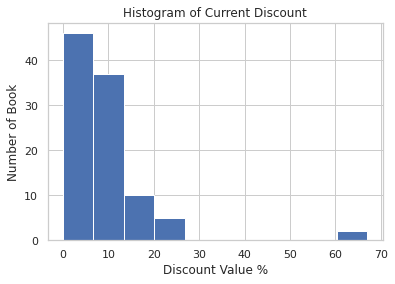

In [261]:
plt.hist(df_nadya['Now Discount(%)'])
plt.xlabel('Discount Value %')
plt.ylabel('Number of Book')
plt.title("Histogram of Current Discount")
plt.show()

Text(0.5, 1.0, 'Boxplot of Current Discount')

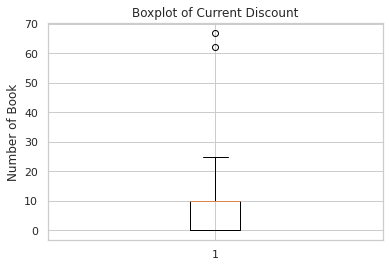

In [262]:
plt.boxplot(df_nadya['Now Discount(%)'])
plt.ylabel('Number of Book')
plt.title("Boxplot of Current Discount")

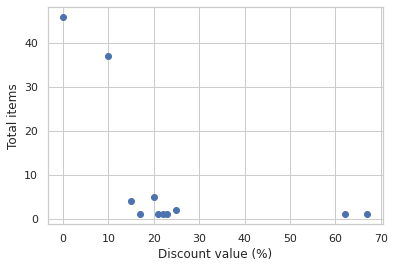

In [263]:
#Scatterplot for the Discount value and the total items that have the discount
tempData = (df_nadya['Now Discount(%)']).value_counts()

plt.figure()
plt.scatter(tempData.index,tempData.values)
plt.xlabel('Discount value (%)')
plt.ylabel('Total items')
plt.show()

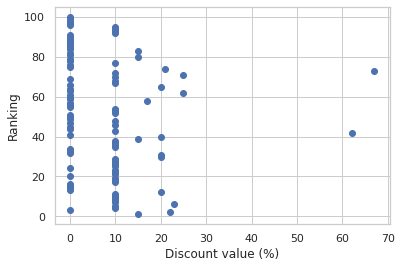

In [264]:
#Scatterplot for the Discount value and the Ranking
plt.figure()
plt.scatter(df_nadya['Now Discount(%)'], df_nadya['Ranking'])
plt.xlabel('Discount value (%)')
plt.ylabel('Ranking')
plt.show()

# **ATTRIBUTE 7: MEMBER PRICE**
# **ATTRIBUTE 8: MEMBER DISCOUNT**

In [265]:
lists = soup.find_all('li', class_="item")
from csv import writer

In [266]:
import string
import numpy as np

disc_arr = []
mprice_arr = []

for list in lists:
  member_price = list.find('span', class_="price").text.replace('RM','')
  discount = list.find('span', text='MEMBER:').find_next('span').text
  new_discount = discount.translate(str.maketrans('', '', string.punctuation))

  disc_arr.append(new_discount)
  mprice_arr.append(member_price)

print(disc_arr, mprice_arr)

['\n RM\n\n\t\t\t\t\t5990\n25 ', '\n RM\n\n\t\t\t\t\t1840\n20 ', '\n RM\n\n\t\t\t\t\t8091\n10 ', '\n RM\n\n\t\t\t\t\t1360\n20 ', '\n RM\n\n\t\t\t\t\t2560\n20 ', '\n RM\n\n\t\t\t\t\t2384\n20 ', '\n RM\n\n\t\t\t\t\t3760\n20 ', '\n RM\n\n\t\t\t\t\t2560\n20 ', '\n RM\n\n\t\t\t\t\t5196\n20 ', '\n RM\n\n\t\t\t\t\t2384\n20 ', '\n RM\n\n\t\t\t\t\t5592\n20 ', '\n RM\n\n\t\t\t\t\t4790\n20 ', '\n RM\n\n\t\t\t\t\t5031\n10 ', '\n RM\n\n\t\t\t\t\t5391\n10 ', '\n RM\n\n\t\t\t\t\t5031\n10 ', '\n RM\n\n\t\t\t\t\t5031\n10 ', '\n RM\n\n\t\t\t\t\t2384\n20 ', '\n RM\n\n\t\t\t\t\t2384\n20 ', '\n RM\n\n\t\t\t\t\t2384\n20 ', '\n RM\n\n\t\t\t\t\t4491\n10 ', '\n RM\n\n\t\t\t\t\t3992\n20 ', '\n RM\n\n\t\t\t\t\t4491\n10 ', '\n RM\n\n\t\t\t\t\t4491\n10 ', '\n RM\n\n\t\t\t\t\t4491\n10 ', '\n RM\n\n\t\t\t\t\t2560\n20 ', '\n RM\n\n\t\t\t\t\t2384\n20 ', '\n RM\n\n\t\t\t\t\t2384\n20 ', '\n RM\n\n\t\t\t\t\t2384\n20 ', '\n RM\n\n\t\t\t\t\t2384\n20 ', '\n RM\n\n\t\t\t\t\t4790\n20 ', '\n RM\n\n\t\t\t\t\t6790\n24 ', '\n RM\

In [267]:
df_mariam = pd.DataFrame({
    "Member Price (RM)": mprice_arr,
    "Member Discount (%)" : disc_arr
})

df_mariam

,Member Price (RM),Member Discount (%)
0,79.90,\n RM\n\n\t\t\t\t\t5990\n25
1,23.00,\n RM\n\n\t\t\t\t\t1840\n20
2,89.90,\n RM\n\n\t\t\t\t\t8091\n10
3,17.00,\n RM\n\n\t\t\t\t\t1360\n20
4,32.00,\n RM\n\n\t\t\t\t\t2560\n20
...,...,...
95,12.00,\n RM\n\n\t\t\t\t\t1200\n0
96,45.90,\n RM\n\n\t\t\t\t\t4131\n10
97,45.90,\n RM\n\n\t\t\t\t\t4131\n10
98,45.90,\n RM\n\n\t\t\t\t\t4131\n10


In [268]:
df_mariam['Member Discount (%)'] = df_mariam['Member Discount (%)'].str[-3:]
df_mariam['Member Discount (%)'] = df_mariam['Member Discount (%)'].str.replace('\n','')
df_mariam['Member Discount (%)'] = df_mariam['Member Discount (%)'].str.replace('00','0')
df_mariam

,Member Price (RM),Member Discount (%)
0,79.90,25
1,23.00,20
2,89.90,10
3,17.00,20
4,32.00,20
...,...,...
95,12.00,0
96,45.90,10
97,45.90,10
98,45.90,10


In [269]:
df_mariam['Member Discount (%)'] = df_mariam['Member Discount (%)'].astype(int)

In [270]:
df_mariam['Member Price (RM)'] = df_mariam['Member Price (RM)'].astype(float)

In [271]:
df_mariam['Member Discount (%)'] = abs(df_mariam['Member Discount (%)'])
df_mariam

,Member Price (RM),Member Discount (%)
0,79.9,25
1,23.0,20
2,89.9,10
3,17.0,20
4,32.0,20
...,...,...
95,12.0,0
96,45.9,10
97,45.9,10
98,45.9,10


# **DATA VISUALISATION: ATTRIBUTE 7 & ATTRIBUTE 8**

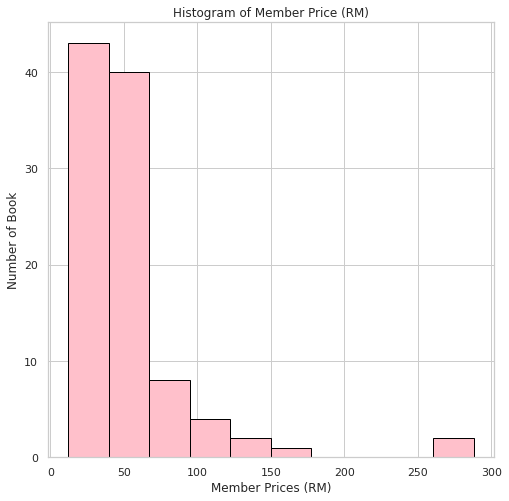

In [272]:
plt.figure(figsize=(8,8))
plt.hist(df_mariam['Member Price (RM)'],
         facecolor = "pink",
         edgecolor = "black")
plt.xlabel('Member Prices (RM)')
plt.ylabel('Number of Book')
plt.title("Histogram of Member Price (RM)")
plt.show()

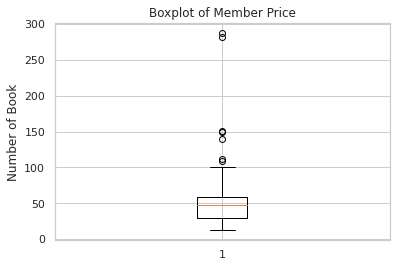

In [273]:
plt.boxplot(df_mariam['Member Price (RM)'])
plt.ylabel('Number of Book')
plt.title("Boxplot of Member Price")
plt.show()

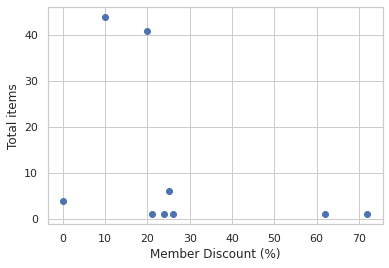

In [274]:
#Scatterplot for the Member Discount and the total items that have the discount
tempData = (df_mariam['Member Discount (%)']).value_counts()

plt.figure()
plt.scatter(tempData.index,tempData.values)
plt.xlabel('Member Discount (%)')
plt.ylabel('Total items')
plt.show()

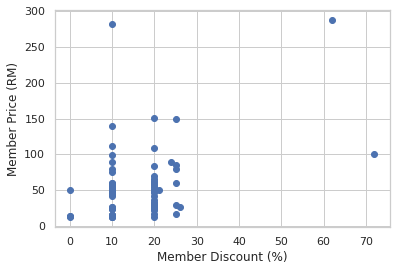

In [275]:
#Scatterplot for the Member Discount value and the Member Price
plt.figure()
plt.scatter(df_mariam['Member Discount (%)'], df_mariam['Member Price (RM)'])
plt.xlabel('Member Discount (%)')
plt.ylabel('Member Price (RM)')
plt.show()

# **Combining All Attributes**

In [276]:
combined1 = df_nazifa.join(combined_aini)
combined2 = combined1.join(df_nadya)
combined_all = combined2.join(df_mariam)
combined_all

,Author,Usual Price (RM),Book Title,Now Price (RM),Label,Ranking,Now Discount(%),Member Price (RM),Member Discount (%)
0,vivy yusof,79.9,the first decade: my journey from blogger to e...,67.9,Cheap,1,15,79.9,25
1,joey yap,23.0,tong shu desktop calendar 2023,17.9,Cheap,2,22,23.0,20
2,jay shetty,89.9,"8 rules of love: how to find it, keep it, and ...",89.9,Cheap,3,0,89.9,10
3,joey yap,17.0,tong shu monthly planner 2023 (random colour x 1),15.3,Cheap,4,10,17.0,20
4,joey yap,32.0,joey yap’s telegram daily tong shu calendar,28.8,Cheap,5,10,32.0,20
...,...,...,...,...,...,...,...,...,...
95,neko,12.0,candy cuties 14 fruit-filled roll cakes topic:...,12.0,Cheap,96,0,12.0,0
96,julia quinn,45.9,"to sir phillip, with love",45.9,Cheap,97,0,45.9,10
97,julia quinn,45.9,romancing mr bridgerton,45.9,Cheap,98,0,45.9,10
98,julia quinn,45.9,when he was wicked,45.9,Cheap,99,0,45.9,10


# **Export to CSV**

In [277]:
combined_all.to_csv('[TEST] Best Selling Book in Popular_ Group 10.csv', encoding = 'utf-8')

In [278]:
df = pd.read_csv('[TEST] Best Selling Book in Popular_ Group 10.csv')
df.head()

,Unnamed: 0,Author,Usual Price (RM),Book Title,Now Price (RM),Label,Ranking,Now Discount(%),Member Price (RM),Member Discount (%)
0,0,vivy yusof,79.9,the first decade: my journey from blogger to e...,67.9,Cheap,1,15,79.9,25
1,1,joey yap,23.0,tong shu desktop calendar 2023,17.9,Cheap,2,22,23.0,20
2,2,jay shetty,89.9,"8 rules of love: how to find it, keep it, and ...",89.9,Cheap,3,0,89.9,10
3,3,joey yap,17.0,tong shu monthly planner 2023 (random colour x 1),15.3,Cheap,4,10,17.0,20
4,4,joey yap,32.0,joey yap’s telegram daily tong shu calendar,28.8,Cheap,5,10,32.0,20


In [279]:
to_drop = ['Unnamed: 0']
df.drop(to_drop, inplace=True, axis=1)
df

,Author,Usual Price (RM),Book Title,Now Price (RM),Label,Ranking,Now Discount(%),Member Price (RM),Member Discount (%)
0,vivy yusof,79.9,the first decade: my journey from blogger to e...,67.9,Cheap,1,15,79.9,25
1,joey yap,23.0,tong shu desktop calendar 2023,17.9,Cheap,2,22,23.0,20
2,jay shetty,89.9,"8 rules of love: how to find it, keep it, and ...",89.9,Cheap,3,0,89.9,10
3,joey yap,17.0,tong shu monthly planner 2023 (random colour x 1),15.3,Cheap,4,10,17.0,20
4,joey yap,32.0,joey yap’s telegram daily tong shu calendar,28.8,Cheap,5,10,32.0,20
...,...,...,...,...,...,...,...,...,...
95,neko,12.0,candy cuties 14 fruit-filled roll cakes topic:...,12.0,Cheap,96,0,12.0,0
96,julia quinn,45.9,"to sir phillip, with love",45.9,Cheap,97,0,45.9,10
97,julia quinn,45.9,romancing mr bridgerton,45.9,Cheap,98,0,45.9,10
98,julia quinn,45.9,when he was wicked,45.9,Cheap,99,0,45.9,10


In [280]:
df.to_csv('Best Selling Book in Popular_Group 10.csv', encoding='utf-8')
df

,Author,Usual Price (RM),Book Title,Now Price (RM),Label,Ranking,Now Discount(%),Member Price (RM),Member Discount (%)
0,vivy yusof,79.9,the first decade: my journey from blogger to e...,67.9,Cheap,1,15,79.9,25
1,joey yap,23.0,tong shu desktop calendar 2023,17.9,Cheap,2,22,23.0,20
2,jay shetty,89.9,"8 rules of love: how to find it, keep it, and ...",89.9,Cheap,3,0,89.9,10
3,joey yap,17.0,tong shu monthly planner 2023 (random colour x 1),15.3,Cheap,4,10,17.0,20
4,joey yap,32.0,joey yap’s telegram daily tong shu calendar,28.8,Cheap,5,10,32.0,20
...,...,...,...,...,...,...,...,...,...
95,neko,12.0,candy cuties 14 fruit-filled roll cakes topic:...,12.0,Cheap,96,0,12.0,0
96,julia quinn,45.9,"to sir phillip, with love",45.9,Cheap,97,0,45.9,10
97,julia quinn,45.9,romancing mr bridgerton,45.9,Cheap,98,0,45.9,10
98,julia quinn,45.9,when he was wicked,45.9,Cheap,99,0,45.9,10
